In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

2024-02-01 12:32:30.518930: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 12:32:30.518994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 12:32:30.520483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 12:32:30.529599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-01 12:32:31.927065: W tensorflow/compiler/tf2

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [5]:
df= pd.read_csv('/content/twitter_sentiment.csv', header=None, index_col=0)

In [6]:
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75682 entries, 2401 to 6960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       75682 non-null  object
 1   2       75682 non-null  object
 2   3       74996 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [8]:
df.sample(10)

,1,2,3
0,,,
4499,Google,Neutral,I love it! Steven (@ vancouvergeek) has tested...
1809,CallOfDutyBlackopsColdWar,Neutral,mm. Fuck it. Oh do actually get it lol.. Main<...
5546,Hearthstone,Negative,@PlayHearthstone On the mobile version I only ...
10038,PlayerUnknownsBattlegrounds(PUBG),Positive,Congratulations
1111,AssassinsCreed,Negative,Uh oh! I surely so could be buying or trying l...
2097,CallOfDuty,Negative,@ATVIAssist Call of duty MW Q -How do I turn o...
1925,CallOfDutyBlackopsColdWar,Irrelevant,IK @ Powerfist.com is going to live here.
10899,TomClancysGhostRecon,Negative,@GhostRecon @Ubisoft @UbisoftSupport nice bu...
494,ApexLegends,Irrelevant,A lot of dumb people in the world giving out a


In [9]:
df= df[[2,3]].reset_index(drop=True)
df

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
df.columns=['sentiment','text']
df

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [13]:
df.isnull().sum()

df.dropna(inplace=True)

In [14]:
df['text'].apply(len)

0         53
1         51
2         50
3         51
4         57
        ... 
75677    281
75678    248
75679    120
75680     49
75681    116
Name: text, Length: 74996, dtype: int64

In [15]:
df=df[df['text'].apply(len)>5]

In [16]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-brt0vhk8
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-brt0vhk8
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=f2d95c28eef010d1110f9e78990be693e8e0688fab040d10488a3f951eaecc09
  Stored in directory: /tmp/pip-ephem-wheel-cache-k60y6r08/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [17]:
import preprocess_kgptalkie as ps

In [18]:
df = ps.get_basic_features(df)
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [19]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns



In [22]:
plt.figure(figsize=(20,10))
nums_col=df.select_dtypes(include='number').columns
df

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...,235,47,5.000000,20,0,0,6,1
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,202,46,4.391304,15,0,0,4,10
75679,Positive,Today sucked so it’s time to drink wine n play...,97,24,4.041667,9,0,0,1,1
75680,Positive,Bought a fraction of Microsoft today. Small wins.,42,8,5.250000,2,0,0,2,0


<Figure size 2000x1000 with 0 Axes>

In [25]:
df.select_dtypes(include='number')
df

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...,235,47,5.000000,20,0,0,6,1
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,202,46,4.391304,15,0,0,4,10
75679,Positive,Today sucked so it’s time to drink wine n play...,97,24,4.041667,9,0,0,1,1
75680,Positive,Bought a fraction of Microsoft today. Small wins.,42,8,5.250000,2,0,0,2,0


<Axes: ylabel='sentiment'>

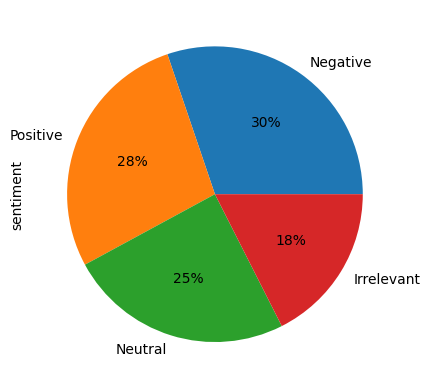

In [30]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [33]:
!pip install wordcloud


In [36]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

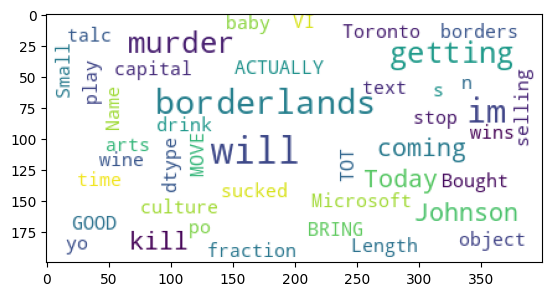

In [38]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=30 ).generate(str(df['text']))
plt.imshow(wordcloud)

# **Data Cleaning**

In [39]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))

# **Split of Train & Test dataset**

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['text'],df['sentiment'], test_size=0.2, random_state=0)

In [41]:
x_train

70828                                        st ghostrecon
44616    okay i was scared and didnt know what was goin...
64280    this bull helvick is a problem eamaddennfl eas...
65559    johnson johnson to stop selling whitening powd...
50491               piss people off at fifa and on twitter
                               ...                        
22067    the construction of this building has failed d...
47727    just spend a hour in home depot home renovatio...
44342                           hey vzwsupport no response
45322    team nice try rhandlerr but your photoshopped ...
70925    was good fun watch wolves get torn apart by th...
Name: text, Length: 58306, dtype: object

In [42]:
x_train.shape, x_test.shape

((58306,), (14577,))

# **Model Building & Testing**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline




In [53]:
clf = Pipeline([('tfid', TfidfVectorizer()), ('rfc', RandomForestClassifier(n_jobs=-1))])
clf.fit(x_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

**Evaluation of model**

In [54]:
from sklearn.metrics import classification_report


In [55]:
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.85      0.91      2561
    Negative       0.92      0.95      0.94      4481
     Neutral       0.92      0.92      0.92      3553
    Positive       0.91      0.94      0.93      3982

    accuracy                           0.93     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.93      0.92     14577



In [56]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl", 'wb'))

In [57]:
clf.predict(['Got awesome experience'])

array(['Positive'], dtype=object)

In [58]:
clf.predict(['Awful service'])

array(['Negative'], dtype=object)

In [59]:
clf.predict(['apple'])

array(['Neutral'], dtype=object)